# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [4]:
# OS to use file system 1
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

In [5]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


In [6]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l
Time,,,,,
2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Fragestellung

## Analyse

Um die Daten hinsichtlich eines systematischen Problems zu untersuchen, wurden diese im ersten Schritt visualisiert.
Bei der visualisierung wird zunächst der Trendverlauf untersucht um diesen dann nach den vorgaben eines systematischen Problems zu betrachten.
Ein Definition für ein systematisches Problem lautet: 

Systematische Probleme zeichnen sich dadurch aus, dass sie nicht isolierte Vorfälle sind, sondern auf grundlegenden Struktur- oder Prozessproblemen im System beruhen. Solche Probleme neigen dazu, sich regelmäßig zu wiederholen oder auf verschiedene Weisen in Erscheinung zu treten. Die Lösung solcher Probleme erfordert oft eine gründliche Analyse der zugrunde liegenden Strukturen, Prozesse oder Mechanismen, die das System ausmachen.

Betrachtung der Daten:

<Figure size 1000x600 with 0 Axes>

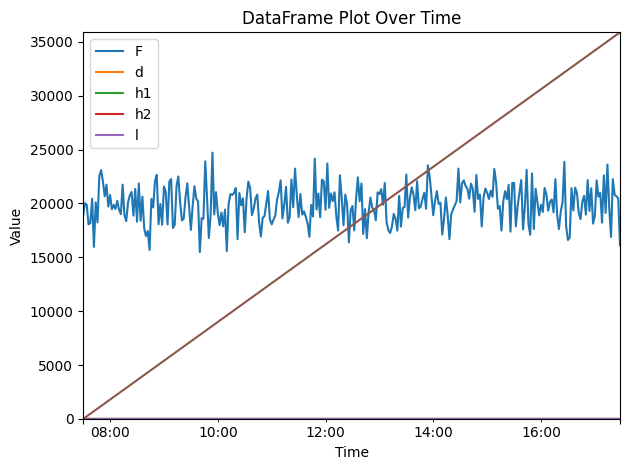

In [50]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

plt.figure(figsize=(10, 6))
df.plot()

plt.title('DataFrame Plot Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(df.index.min(), df.index.max())

# Set y-axis limits based on the minimum and maximum values excluding the 'Time' column
plt.ylim(df.iloc[:, 1:].min().min(), df.iloc[:, 1:].max().max())

# Customize Legend (replace with your column names)
plt.legend(['F', 'd', 'h1', 'h2', 'l'], loc='best')

plt.tight_layout()
plt.show()



Isolierte Darstellung des Kraftverlaufes über die Zeit:

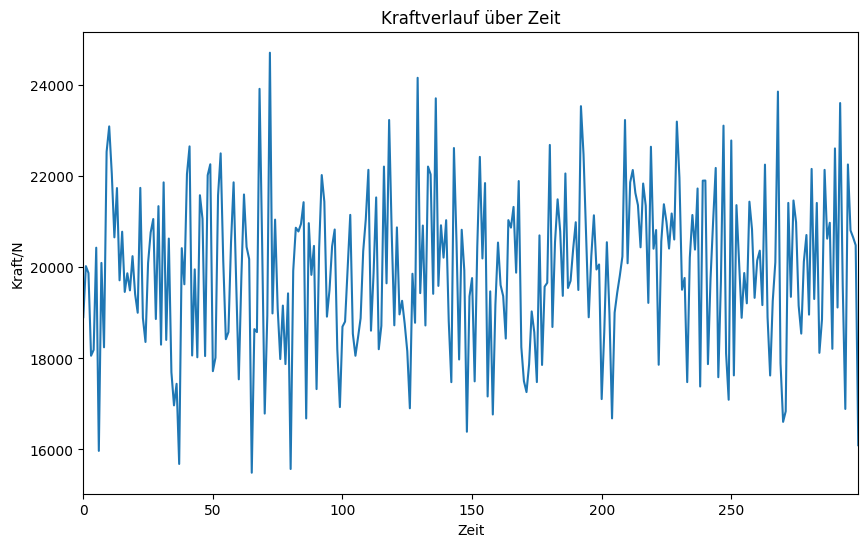

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['F'])
plt.title('Kraftverlauf über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Kraft/N')
plt.xlim(df.index.min(), df.index.max())
plt.show()


Einfügen einer Trendlinie mittels linearer Regression um ein Ansteigen, oder abnehemen im allgemeinen bewerten zu können:

Index(['Time', 'F', 'd', 'h1', 'h2', 'l', 'Time_numeric'], dtype='object')


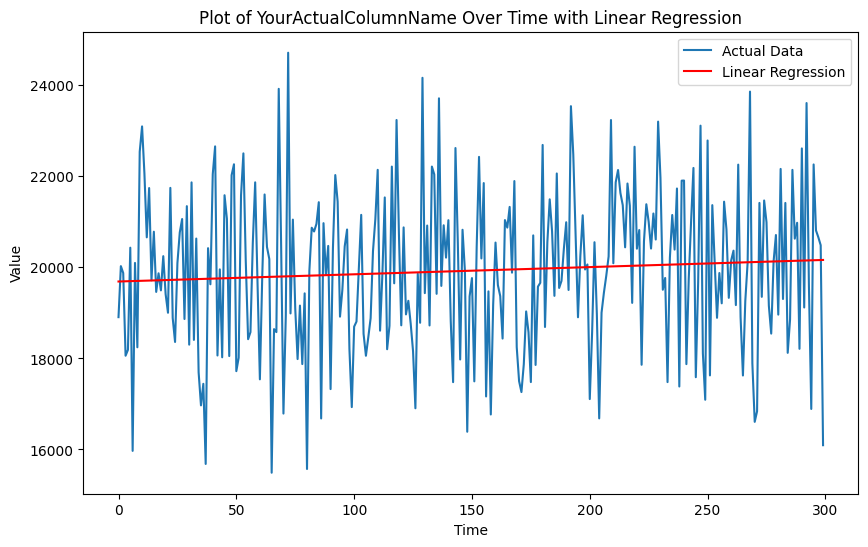

In [41]:
import numpy as np
from scipy.stats import linregress

# Print column names to identify the correct column name
print(df.columns)

# Choose the correct column name for 'x' and 'y' based on your data
x = df.index
y = df['F']  # Replace 'YourActualColumnName' with the correct column name

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x=np.arange(len(y)), y=y)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Actual Data')

# Plotting the linear regression line
plt.plot(x, intercept + slope * np.arange(len(y)), 'r', label='Linear Regression')

plt.title('Plot of YourActualColumnName Over Time with Linear Regression')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Untersuchungen mit polynomisch angenhäherten Linien, um ein ein zyklisches Wiederkehren beobachtbar zu machen:

Index(['Time', 'F', 'd', 'h1', 'h2', 'l'], dtype='object')


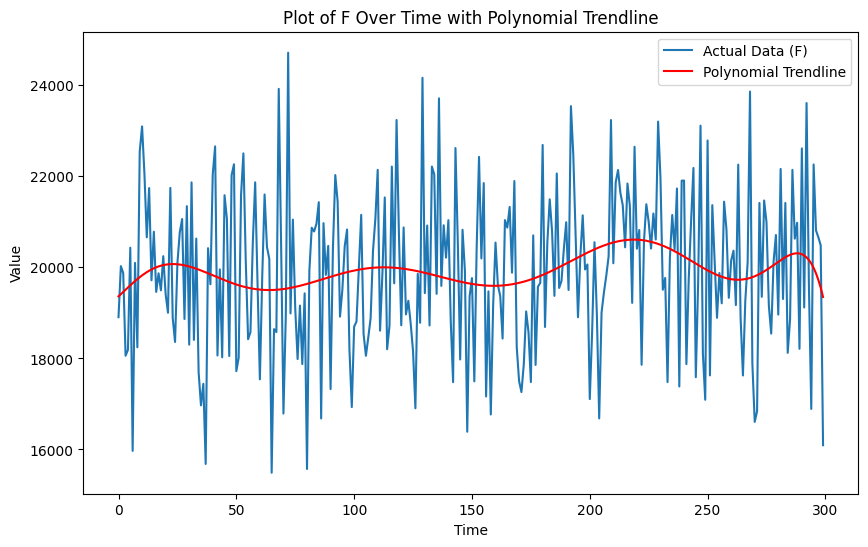

In [26]:
import numpy as np

# Print column names to identify the correct column name
print(df.columns)

# Choose the correct column name for 'x' and 'y' based on your data
x = df.index
y_column_name = 'F'  # Replace 'YourActualColumnName' with the correct column name
y = df[y_column_name]

# Fit a polynomial of degree 2 (you can change the degree as needed)
coefficients = np.polyfit(x=np.arange(len(y)), y=y, deg=9)

# Generate y values for the polynomial fit
poly_fit_y = np.polyval(coefficients, np.arange(len(y)))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Actual Data ({y_column_name})')

# Plotting the polynomial trendline
plt.plot(x, poly_fit_y, 'r', label='Polynomial Trendline')

plt.title(f'Plot of {y_column_name} Over Time with Polynomial Trendline')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Index(['Time', 'F', 'd', 'h1', 'h2', 'l'], dtype='object')


C:\Users\hardt\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


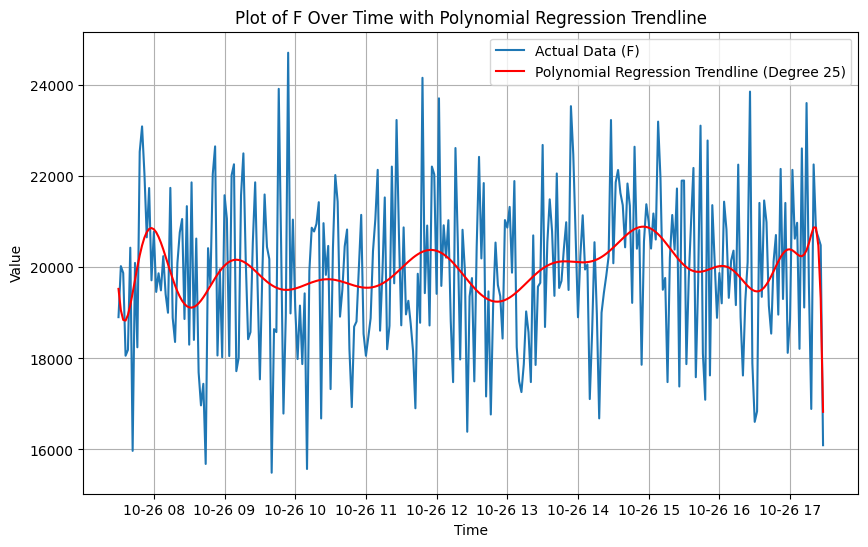

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('SpringPBData.csv')

# Check and print column names to identify the correct column name
print(df.columns)

# Choose the correct column name for 'x' and 'y' based on your data
x_column_name = 'Time'  # Replace with the correct column name for x values
y_column_name = 'F'  # Replace with the correct column name for y values

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Convert 'Time' to numeric format (e.g., seconds since a reference time)
df['Time_numeric'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# Extract x and y values from the DataFrame
x = df['Time_numeric']
y = df[y_column_name]

# Perform polynomial regression with the desired degree
degree = 25  # Polynomgrad anpassen
coefficients = np.polyfit(x, y, deg=degree)

# Generate y values for the polynomial fit
poly_fit_y = np.polyval(coefficients, x)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], y, label=f'Actual Data ({y_column_name})')

# Plotting the polynomial regression trendline
plt.plot(df['Time'], poly_fit_y, 'r', label=f'Polynomial Regression Trendline (Degree {degree})')
plt.grid(True)
plt.title(f'Plot of {y_column_name} Over Time with Polynomial Regression Trendline')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Untersuchung nach Anzahl der Werte unter mit einer Kraft unter 18000N:

In [51]:
import pandas as pd

# Lese die CSV-Datei ein
csv_datei = 'SpringPBData.csv' 
daten = pd.read_csv(csv_datei)

# Extrahiere die Spalte F und zähle die Werte unter 18000
anzahl_unter_18000 = daten['F'].lt(18000).sum()

# Gib das Ergebnis aus
print(f"Anzahl der Werte unter 18000 in Spalte F: {anzahl_unter_18000}")

Anzahl der Werte unter 18000 in Spalte F: 42


Anwendung einer Korrelationsmatrix zur Untersuchung nach Korrelation zwischen Kraftwerten und den Längenwerten:

In [19]:
import pandas as pd

# Lese die CSV-Datei ein
csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
daten = pd.read_csv(csv_datei)

# Wähle die relevanten Spalten aus
interessante_spalten = ['l', 'h1', 'h2', 'd', 'F']
daten_relevant = daten[interessante_spalten]

# Erstelle die Korrelationsmatrix
korrelationsmatrix = daten_relevant.corr()

# Gib die Korrelationsmatrix aus
print("Korrelationsmatrix:")
print(korrelationsmatrix)


Korrelationsmatrix:
           l        h1        h2         d         F
l   1.000000 -0.012566  0.699381 -0.004543  0.645387
h1 -0.012566  1.000000  0.705904  0.016781  0.667759
h2  0.699381  0.705904  1.000000  0.008777  0.934486
d  -0.004543  0.016781  0.008777  1.000000  0.325720
F   0.645387  0.667759  0.934486  0.325720  1.000000


In [52]:
import pandas as pd

# Lese die Original-CSV-Datei ein
csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
daten = pd.read_csv(csv_datei)

# Filtere die Daten und behalte nur Zeilen, bei denen F <= 18000 ist
gefilterte_daten = daten[daten['F'] <= 18000]

# Speichere die gefilterten Daten in einer neuen CSV-Datei
neue_csv_datei = 'GefilterteSpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten.to_csv(neue_csv_datei, index=False)

print(f"Die gefilterten Daten wurden in der Datei '{neue_csv_datei}' gespeichert.")


Die gefilterten Daten wurden in der Datei 'GefilterteSpringPBData.csv' gespeichert.


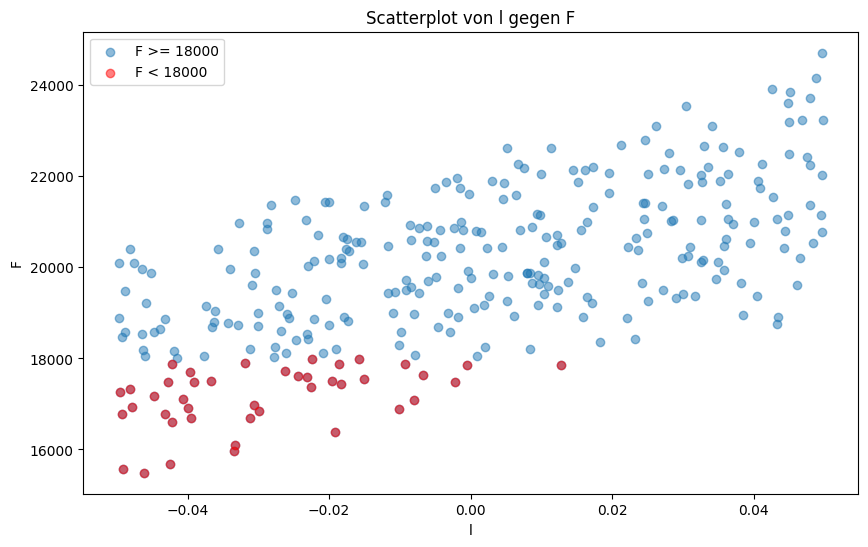

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Lese die gefilterte CSV-Datei ein
neue_csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten = pd.read_csv(neue_csv_datei)

# Filtere die Daten für F < 18000
gefilterte_daten_unter_18000 = gefilterte_daten[gefilterte_daten['F'] < 18000]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Scatterplot für 'l' gegen 'F' mit unterschiedlichen Farben für F < 18000
plt.scatter(gefilterte_daten['l'], gefilterte_daten['F'], alpha=0.5, label='F >= 18000')
plt.scatter(gefilterte_daten_unter_18000['l'], gefilterte_daten_unter_18000['F'], c='red', alpha=0.5, label='F < 18000')
plt.title('Scatterplot von l gegen F')
plt.xlabel('l')
plt.ylabel('F')

plt.legend()  # Zeige die Legende an

plt.show()


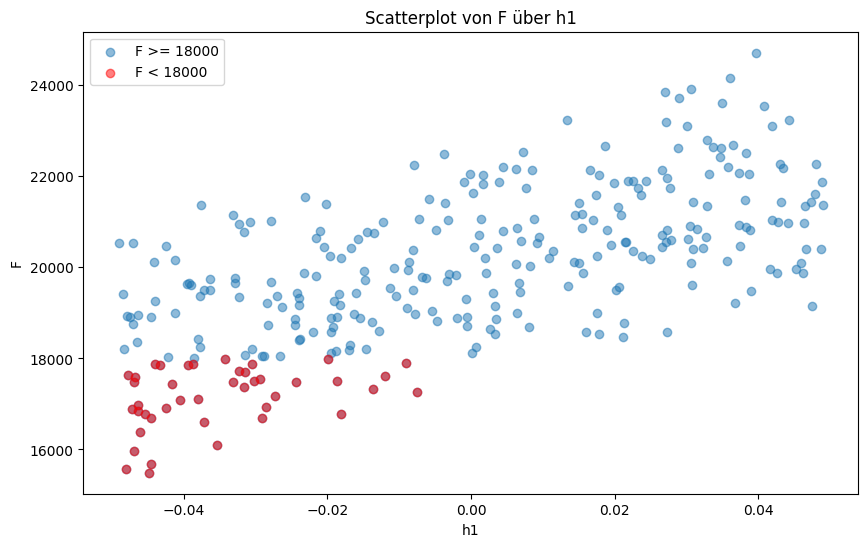

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Lese die gefilterte CSV-Datei ein
neue_csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten = pd.read_csv(neue_csv_datei)

# Filtere die Daten für F < 18000
gefilterte_daten_unter_18000 = gefilterte_daten[gefilterte_daten['F'] < 18000]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Scatterplot für 'h1' gegen 'F' mit unterschiedlichen Farben für F < 18000
plt.scatter(gefilterte_daten['h1'], gefilterte_daten['F'], alpha=0.5, label='F >= 18000')
plt.scatter(gefilterte_daten_unter_18000['h1'], gefilterte_daten_unter_18000['F'], c='red', alpha=0.5, label='F < 18000')
plt.title('Scatterplot von F über h1')
plt.xlabel('h1')
plt.ylabel('F')

plt.legend()  # Zeige die Legende an

plt.show()


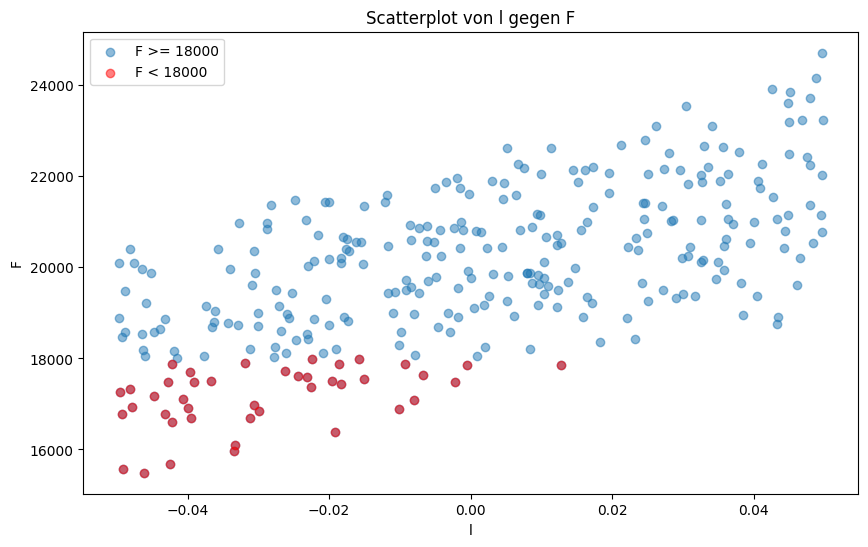

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Lese die gefilterte CSV-Datei ein
neue_csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten = pd.read_csv(neue_csv_datei)

# Filtere die Daten für F < 18000
gefilterte_daten_unter_18000 = gefilterte_daten[gefilterte_daten['F'] < 18000]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Scatterplot für 'l' gegen 'F' mit unterschiedlichen Farben für F < 18000
plt.scatter(gefilterte_daten['l'], gefilterte_daten['F'], alpha=0.5, label='F >= 18000')
plt.scatter(gefilterte_daten_unter_18000['l'], gefilterte_daten_unter_18000['F'], c='red', alpha=0.5, label='F < 18000')
plt.title('Scatterplot von F über l')
plt.xlabel('l')
plt.ylabel('F')

plt.legend()  # Zeige die Legende an

plt.show()


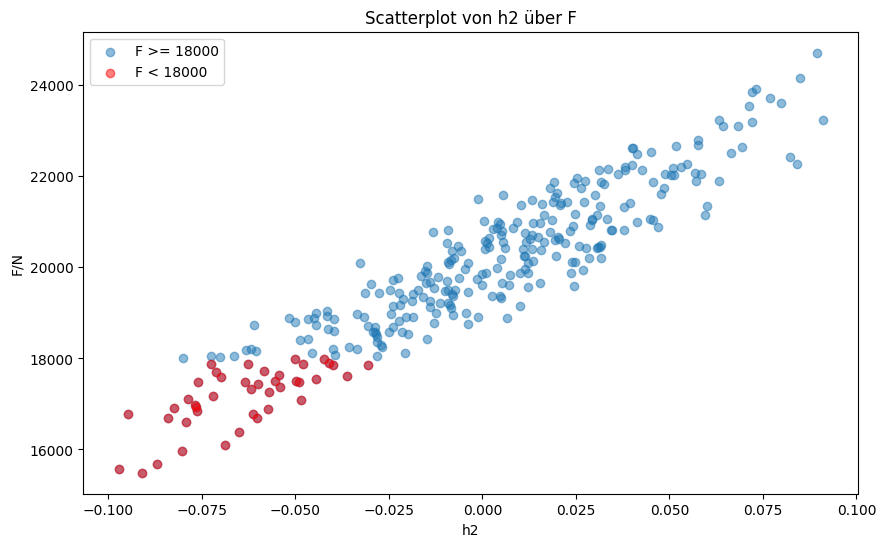

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Lese die gefilterte CSV-Datei ein
neue_csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten = pd.read_csv(neue_csv_datei)

# Filtere die Daten für F < 18000
gefilterte_daten_unter_18000 = gefilterte_daten[gefilterte_daten['F'] < 18000]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Scatterplot für 'h2' gegen 'F' mit unterschiedlichen Farben für F < 18000
plt.scatter(gefilterte_daten['h2'], gefilterte_daten['F'], alpha=0.5, label='F >= 18000')
plt.scatter(gefilterte_daten_unter_18000['h2'], gefilterte_daten_unter_18000['F'], c='red', alpha=0.5, label='F < 18000')
plt.title('Scatterplot von h2 über F')
plt.xlabel('h2')
plt.ylabel('F/N')

plt.legend()  # Zeige die Legende an

plt.show()


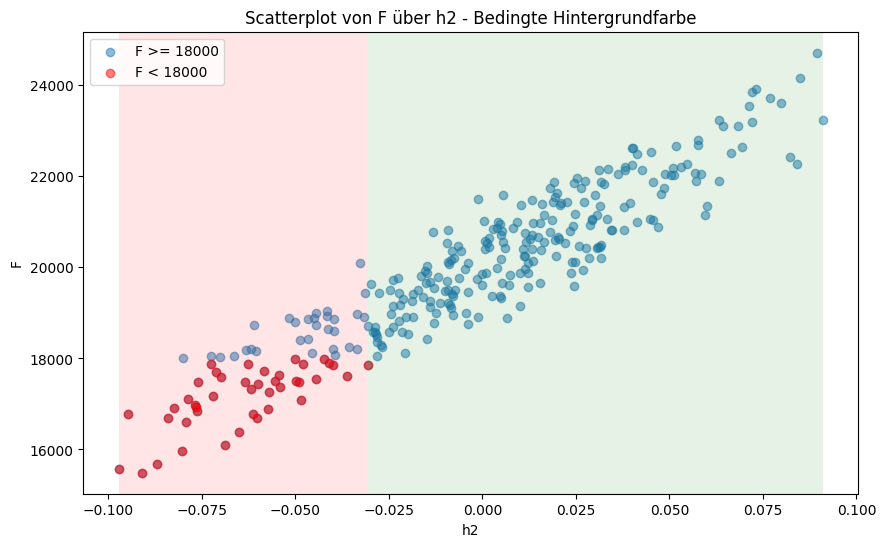

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Lese die gefilterte CSV-Datei ein
neue_csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
gefilterte_daten = pd.read_csv(neue_csv_datei)

# Filtere die Daten für F < 18000
gefilterte_daten_unter_18000 = gefilterte_daten[gefilterte_daten['F'] < 18000]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Scatterplot für 'h2' gegen 'F' mit unterschiedlichen Farben für F < 18000
plt.scatter(gefilterte_daten['h2'], gefilterte_daten['F'], alpha=0.5, label='F >= 18000')
plt.scatter(gefilterte_daten_unter_18000['h2'], gefilterte_daten_unter_18000['F'], c='red', alpha=0.5, label='F < 18000')
plt.title('Scatterplot von F über h2 - Bedingte Hintergrundfarbe')
plt.xlabel('h2')
plt.ylabel('F')

# Hintergrundfarbe anpassen
plt.axvspan(gefilterte_daten_unter_18000['h2'].min(), gefilterte_daten_unter_18000['h2'].max(), facecolor='red', alpha=0.1)
plt.axvspan(gefilterte_daten_unter_18000['h2'].max(), gefilterte_daten['h2'].max(), facecolor='green', alpha=0.1)

plt.legend()  # Zeige die Legende an

plt.show()

## Ergebnis

Zu 1: Ein systematischer Fehler kann nicht erkannt werden. Darstellungen über einen polynomialen Trend zeigen keine konstanten Zeitlichen Abstände
Zu 2: Die Anzahl betoffener Einheiten lässt sich ermitteln zu 42 Stück.
Zu 3: Über eine Korrelationsmatrix lässt sich erkennen, dass der Längenwert h2 die höchste Korrelation mit F aufweist. Dies wird über einzelne Scatterplots verdeutlicht. Der Scatterplot für F über h2 zeigt einen Beginn des Fehlers für Werte kleiner ungefähr -0,03. Je weiter die abnahme des Wertes für h2 deste höher die Fehlerwahrscheinlichkeit, bis ungefähr -0,08. Von dort an ist jeder Kraftwert ungenügend!